# Module 5

In [5]:
import pandas as pd
import numpy as np
import math

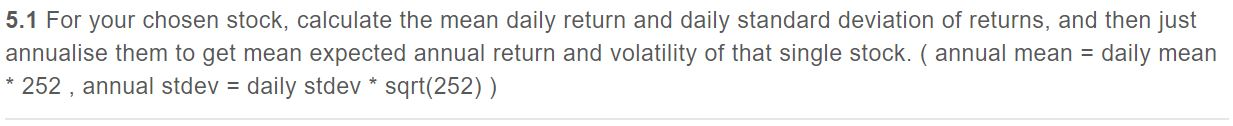

In [6]:
apple=pd.read_csv('AAPL.csv')

In [7]:
apple.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


In [8]:
apple['daily_mean']=apple['Close Price'].pct_change().mean()
apple['daily_std']=apple['Close Price'].pct_change().std()

In [9]:
annual_mean=(apple['daily_mean'].mean())*252
volatility=(apple['daily_std'].std())*(math.sqrt(252))

print(f'Annual_mean : {annual_mean} and Volatility: {volatility}')


Annual_mean : -0.18376274049981636 and Volatility: 1.6539177592999624e-16


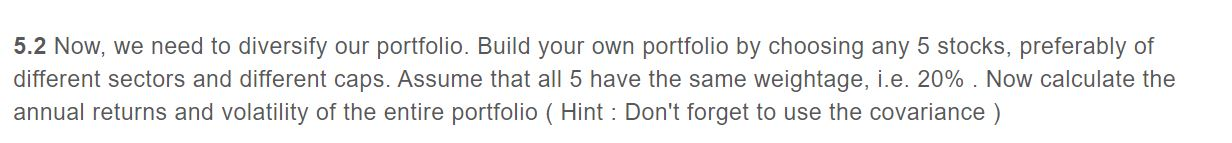

In [52]:
#sleected stocks
titan=pd.read_csv('TITAN.csv')
pvr=pd.read_csv('PVR.csv')
lemon=pd.read_csv('LEMONTREE.csv')
reliance=pd.read_csv('RELIANCE.csv')
pnb=pd.read_csv('PNB.csv')

In [53]:
#creating dataframe
column_names = ['titan', 'pvr', 'lemon','reliance','pnb']

data= pd.DataFrame(columns = column_names)

In [54]:
#initailsing stock prices
data['titan'] = titan['Close Price']
data['pvr'] = pvr['Close Price']
data['lemon'] = lemon['Close Price']
data['reliance'] = reliance['Close Price']
data['pnb'] = pnb['Close Price']

In [55]:
#dataset formed with 5 different stock's  closing prices
data.head()

,titan,pvr,lemon,reliance,pnb
0,483.65,1524.95,71.65,1344.10,166.80
1,488.30,1539.00,66.85,1356.30,174.15
2,481.75,1530.30,66.95,1353.10,165.05
3,471.65,1515.05,66.40,1327.35,158.50
4,471.15,1513.55,67.70,1318.85,155.20


In [56]:
#calculating Acoording mordern portfolio theory
returns = data.pct_change()
mean_returns = returns.mean().values.reshape(5,1)
cov = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])

#weights of repective stocks
portfolio_return = np.sum(mean_returns * weights) * 252
portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(cov, weights))) * np.sqrt(252)
print(f'Expected portfolio \n\tAnnualised return : {portfolio_return} \n\tVolatility : {portfolio_stdev}')

Expected portfolio 
	Annualised return : 0.47960937530298264 
	Volatility : 0.18935815416712573


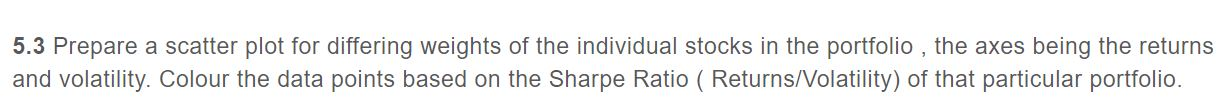

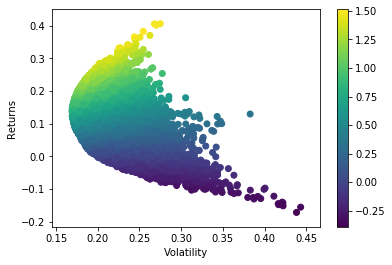

In [59]:
import matplotlib.pyplot as plt

returns_mean=returns.mean()

num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(returns_mean * weights) * 252
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(cov, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

results_frame
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

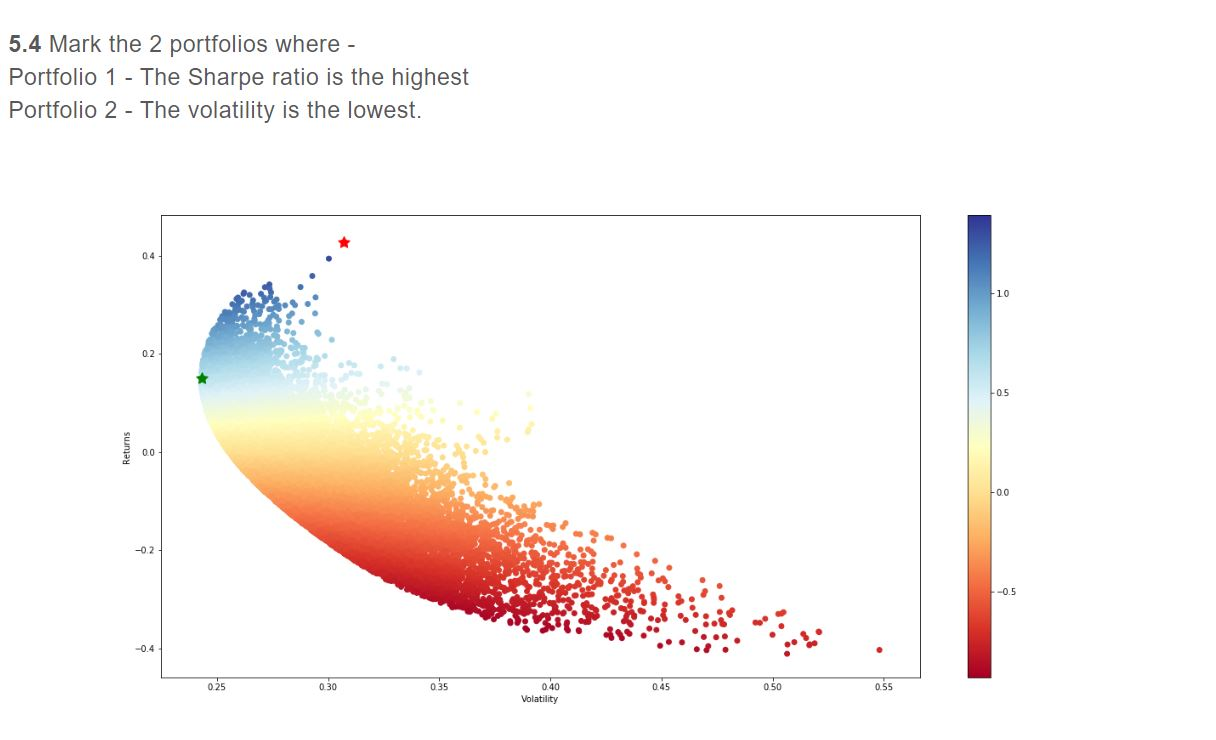

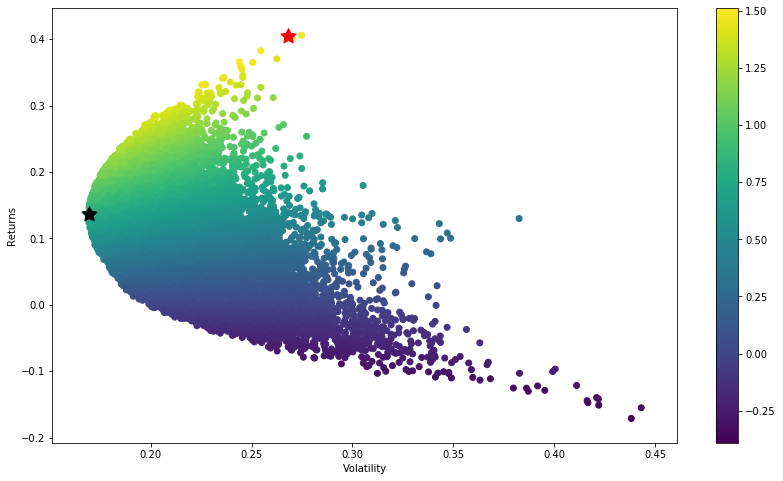

In [73]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(14,8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='black',s=250)